# **Project Title : Goodreads Book**

**Problem Statement:**

Explore a comprehensive dataset of books from the Goodreads API to analyze ratings, popularity, and genres. Conduct EDA to uncover trends, analyze ratings, popularity, genres, and develop a recommendation system for personalized book suggestions.

**Objective:**

1. Conduct EDA to understand the dataset's structure and identify key trends.
2. Analyze book ratings and factors influencing them (e.g., publication year, author, genre).
3. Investigate book popularity based on reviews and ratings across genres and time.
4. Explore genre distribution and trends over time among readers.
5. Develop a recommendation system for personalized book suggestions.

**Expected Deliverables:**

1. EDA report highlighting key insights and trends.
2. Visualizations illustrating trends and patterns.
3. Rating and popularity analysis reports.
4. Genre analysis report showcasing trends.
5. Recommendation system implementation for personalized suggestions.

**Key Challenges:**

1. Handling missing or incomplete data.
2. Efficiently managing large volumes of data.
3. Ensuring accuracy and effectiveness of the recommendation system.
4. Addressing biases or limitations in the dataset.

**Success Criteria:**

1. Uncover meaningful insights through EDA.
2. Develop an effective recommendation system for users.
3. Provide actionable recommendations for stakeholders in the book industry.

###Import libraries

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from pathlib import Path
import tensorflow_hub as hub
import glob
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to the directory containing the CSV files
directory_path = "/content/drive/MyDrive/project_List/models/All model and dataset/Book review"

###Dataframe

In [4]:
# List to store DataFrames
dataframes = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

In [5]:
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

In [6]:
# Display the first few rows of the merged DataFrame
merged_df.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,...,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber,ID
0,1.0,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652.0,4:556485,total:2298124,16.0,9.0,Scholastic Inc.,28062.0,...,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN,NaN,NaN
1,2.0,Harry Potter and the Order of the Phoenix (Har...,1:12455,870.0,4:604283,total:2358637,1.0,9.0,Scholastic Inc.,29770.0,...,J.K. Rowling,4.5,2:37005,5:1493113,0439358078,3:211781,NaN,NaN,NaN,NaN
2,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309.0,4:1513191,total:6587388,1.0,11.0,Scholastic Inc,75911.0,...,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN,NaN,NaN
3,4.0,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352.0,4:706082,total:2560657,1.0,11.0,Scholastic,244.0,...,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN,NaN,NaN
4,5.0,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435.0,4:630534,total:2610317,1.0,5.0,Scholastic Inc.,37093.0,...,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN,NaN,NaN


In [7]:
merged_df.columns

Index(['Id', 'Name', 'RatingDist1', 'pagesNumber', 'RatingDist4',
       'RatingDistTotal', 'PublishMonth', 'PublishDay', 'Publisher',
       'CountsOfReview', 'PublishYear', 'Language', 'Authors', 'Rating',
       'RatingDist2', 'RatingDist5', 'ISBN', 'RatingDist3', 'Description',
       'Count of text reviews', 'PagesNumber', 'ID'],
      dtype='object')

In [8]:
merged_df.shape

(2212906, 22)

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212906 entries, 0 to 2212905
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     float64
 1   Name                   object 
 2   RatingDist1            object 
 3   pagesNumber            float64
 4   RatingDist4            object 
 5   RatingDistTotal        object 
 6   PublishMonth           float64
 7   PublishDay             float64
 8   Publisher              object 
 9   CountsOfReview         float64
 10  PublishYear            float64
 11  Language               object 
 12  Authors                object 
 13  Rating                 object 
 14  RatingDist2            object 
 15  RatingDist5            object 
 16  ISBN                   object 
 17  RatingDist3            object 
 18  Description            object 
 19  Count of text reviews  float64
 20  PagesNumber            float64
 21  ID                     float64
dtypes: float64(9), obj

In [10]:
# Missing Value Count Function
def show_missing():
    missing = merged_df.columns[merged_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(merged_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(merged_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(merged_df)*100,2))

Missing Data Count
Language                 1961084
ID                       1850310
Count of text reviews    1803209
pagesNumber              1377828
PagesNumber              1197674
Description              1041718
Publisher                 380422
ISBN                      368519
RatingDist2               362596
RatingDist3               362596
RatingDist5               362596
Authors                   362596
RatingDist4               362596
RatingDist1               362596
PublishYear               362596
CountsOfReview            362596
PublishDay                362596
PublishMonth              362596
RatingDistTotal           362596
Id                        362596
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Language                 88.62
ID                       83.61
Count of text reviews    81.49
pagesNumber              62.26
PagesNumber              54.12
Description              47.

###Handling missing values

###We will drop null values which is more than 50%

In [11]:
# Drop columns with more than 50% null values
merged_df.drop(columns=['Language', 'ID', 'Count of text reviews', 'pagesNumber', 'PagesNumber'], inplace=True)

In [12]:
merged_df['Description'].value_counts()

Description
This scarce antiquarian book is a facsimile reprint of the original. Due to its age, it may contain imperfections such as marks, notations, marginalia and flawed pages. Because we believe this work is culturally important, we have made it available as part of our commitment for protecting, preserving, and promoting the world's literature in affordable, high quality, modern editions that are true to the original work.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [13]:
# Replace missing values in 'Description' column with a placeholder string
merged_df['Description'].fillna("Description not available", inplace=True)

In [14]:
merged_df['Description'].isnull().sum()

0

In [15]:
merged_df['Publisher'].value_counts()

Publisher
Routledge                       37645
Springer                        35810
Oxford University Press, USA    26988
Cambridge University Press      25958
Wiley                           12139
                                ...  
Ta Ha Publishers Ltd.               1
Hodder Christian Paperbacks         1
Maverick Distributors               1
Iqbal Academy                       1
Pilgrims Process, Inc.              1
Name: count, Length: 79422, dtype: int64

In [16]:
# Find the most frequent publisher
most_frequent_publisher = merged_df['Publisher'].mode()[0]

In [17]:
# Replace missing values with the most frequent publisher
merged_df['Publisher'].fillna(most_frequent_publisher, inplace=True)

In [18]:
merged_df['Publisher'].isnull().sum()

0

In [19]:
columns = ['ISBN', 'RatingDist2', 'RatingDist3', 'RatingDist5', 'Authors', 'RatingDist4', 'RatingDist1', 'PublishYear', 'CountsOfReview', 'PublishDay', 'PublishMonth', 'RatingDistTotal', 'Id']

In [20]:
# Impute with placeholder for categorical columns
merged_df['ISBN'].fillna("Unknown", inplace=True)
merged_df['RatingDist2'].fillna("Unknown", inplace=True)
merged_df['RatingDist3'].fillna("Unknown", inplace=True)
merged_df['RatingDist4'].fillna("Unknown", inplace=True)
merged_df['RatingDist5'].fillna("Unknown", inplace=True)
merged_df['Authors'].fillna("Unknown", inplace=True)
merged_df['RatingDist1'].fillna("Unknown", inplace=True)
merged_df['RatingDistTotal'].fillna("Unknown", inplace=True)

# Impute with mean for numerical columns
merged_df['PublishYear'].fillna(merged_df['PublishYear'].mean(), inplace=True)
merged_df['CountsOfReview'].fillna(merged_df['CountsOfReview'].mean(), inplace=True)
merged_df['PublishDay'].fillna(merged_df['PublishDay'].mean(), inplace=True)
merged_df['PublishMonth'].fillna(merged_df['PublishMonth'].mean(), inplace=True)
merged_df['Id'].fillna(merged_df['Id'].mean(), inplace=True)

In [21]:
merged_df.isnull().sum()

Id                 0
Name               0
RatingDist1        0
RatingDist4        0
RatingDistTotal    0
PublishMonth       0
PublishDay         0
Publisher          0
CountsOfReview     0
PublishYear        0
Authors            0
Rating             0
RatingDist2        0
RatingDist5        0
ISBN               0
RatingDist3        0
Description        0
dtype: int64

In [22]:
merged_df.head()

,Id,Name,RatingDist1,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description
0,1.0,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,4:556485,total:2298124,16.0,9.0,Scholastic Inc.,28062.0,2006.0,J.K. Rowling,4.57,2:25317,5:1546466,Unknown,3:159960,Description not available
1,2.0,Harry Potter and the Order of the Phoenix (Har...,1:12455,4:604283,total:2358637,1.0,9.0,Scholastic Inc.,29770.0,2004.0,J.K. Rowling,4.5,2:37005,5:1493113,0439358078,3:211781,Description not available
2,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,4:1513191,total:6587388,1.0,11.0,Scholastic Inc,75911.0,2003.0,J.K. Rowling,4.47,2:130310,5:4268227,Unknown,3:567458,Description not available
3,4.0,Harry Potter and the Chamber of Secrets (Harry...,1:11896,4:706082,total:2560657,1.0,11.0,Scholastic,244.0,2003.0,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,Description not available
4,5.0,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,4:630534,total:2610317,1.0,5.0,Scholastic Inc.,37093.0,2004.0,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,Description not available


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212906 entries, 0 to 2212905
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               float64
 1   Name             object 
 2   RatingDist1      object 
 3   RatingDist4      object 
 4   RatingDistTotal  object 
 5   PublishMonth     float64
 6   PublishDay       float64
 7   Publisher        object 
 8   CountsOfReview   float64
 9   PublishYear      float64
 10  Authors          object 
 11  Rating           object 
 12  RatingDist2      object 
 13  RatingDist5      object 
 14  ISBN             object 
 15  RatingDist3      object 
 16  Description      object 
dtypes: float64(5), object(12)
memory usage: 287.0+ MB


###EDA

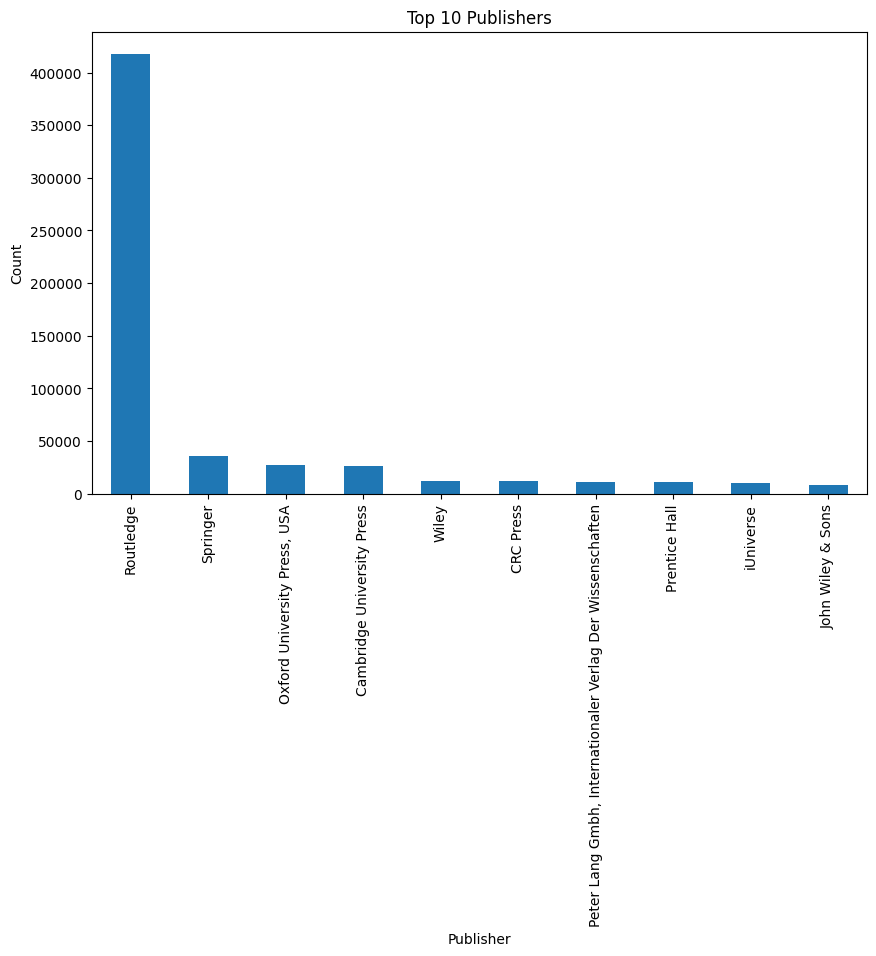

In [24]:
plt.figure(figsize=(10,6))
merged_df['Publisher'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Top 10 Publishers')
plt.show()

###Convert Data Types

In [25]:
# Convert columns to appropriate data types after handling NaN values
merged_df['RatingDist1'] = merged_df['RatingDist1'].str.split(':').str[1].fillna(0).astype(int)
merged_df['RatingDist2'] = merged_df['RatingDist2'].str.split(':').str[1].fillna(0).astype(int)
merged_df['RatingDist3'] = merged_df['RatingDist3'].str.split(':').str[1].fillna(0).astype(int)
merged_df['RatingDist4'] = merged_df['RatingDist4'].str.split(':').str[1].fillna(0).astype(int)
merged_df['RatingDist5'] = merged_df['RatingDist5'].str.split(':').str[1].fillna(0).astype(int)
merged_df['RatingDistTotal'] = merged_df['RatingDistTotal'].str.split(':').str[1].fillna(0).astype(int)
merged_df['PublishMonth'] = merged_df['PublishMonth'].fillna(0).astype(int)
merged_df['PublishDay'] = merged_df['PublishDay'].fillna(0).astype(int)
merged_df['PublishYear'] = merged_df['PublishYear'].fillna(0).astype(int)
merged_df['CountsOfReview'] = merged_df['CountsOfReview'].fillna(0).astype(int)

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212906 entries, 0 to 2212905
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               float64
 1   Name             object 
 2   RatingDist1      int64  
 3   RatingDist4      int64  
 4   RatingDistTotal  int64  
 5   PublishMonth     int64  
 6   PublishDay       int64  
 7   Publisher        object 
 8   CountsOfReview   int64  
 9   PublishYear      int64  
 10  Authors          object 
 11  Rating           object 
 12  RatingDist2      int64  
 13  RatingDist5      int64  
 14  ISBN             object 
 15  RatingDist3      int64  
 16  Description      object 
dtypes: float64(1), int64(10), object(6)
memory usage: 287.0+ MB


In [27]:
merged_df.head()

,Id,Name,RatingDist1,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description
0,1.0,Harry Potter and the Half-Blood Prince (Harry ...,9896,556485,2298124,16,9,Scholastic Inc.,28062,2006,J.K. Rowling,4.57,25317,1546466,Unknown,159960,Description not available
1,2.0,Harry Potter and the Order of the Phoenix (Har...,12455,604283,2358637,1,9,Scholastic Inc.,29770,2004,J.K. Rowling,4.5,37005,1493113,0439358078,211781,Description not available
2,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,108202,1513191,6587388,1,11,Scholastic Inc,75911,2003,J.K. Rowling,4.47,130310,4268227,Unknown,567458,Description not available
3,4.0,Harry Potter and the Chamber of Secrets (Harry...,11896,706082,2560657,1,11,Scholastic,244,2003,J.K. Rowling,4.42,49353,1504505,0439554896,288821,Description not available
4,5.0,Harry Potter and the Prisoner of Azkaban (Harr...,10128,630534,2610317,1,5,Scholastic Inc.,37093,2004,J.K. Rowling,4.57,24849,1749958,043965548X,194848,Description not available


In [28]:
# Combine textual features
merged_df['combined_features'] = merged_df['Name'] + ' ' + merged_df['Authors'] + ' ' + merged_df['Description']

In [29]:
merged_df['combined_features']

0          Harry Potter and the Half-Blood Prince (Harry ...
1          Harry Potter and the Order of the Phoenix (Har...
2          Harry Potter and the Sorcerer's Stone (Harry P...
3          Harry Potter and the Chamber of Secrets (Harry...
4          Harry Potter and the Prisoner of Azkaban (Harr...
                                 ...                        
2212901    The Quest for Consciousness: A Neurobiological...
2212902    Palestine's Children: Returning to Haifa and O...
2212903    The Question of Palestine Unknown Description ...
2212904       Out of Place Unknown Description not available
2212905    From Oslo to Iraq and the Road Map: Essays Unk...
Name: combined_features, Length: 2212906, dtype: object

###Scale Features

In [30]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['RatingDist1', 'RatingDist4', 'RatingDistTotal', 'PublishMonth', 'PublishDay', 'CountsOfReview', 'PublishYear', 'RatingDist2', 'RatingDist5', 'RatingDist3']
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])

###Tfidf

In [31]:
# Initialize TfidfVectorizer to convert text to vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [32]:
# Fit and transform the 'combined_features' column to create a document-term matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['combined_features'])

###Cosine similarity

In [ ]:
# Compute cosine similarity between items based on multiple features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Function to recommend items based on cosine similarity
def recommend_item(item_id, cosine_sim=cosine_sim, data=merged_df):
    # Get the index of the item
    idx = data[data['Id'] == item_id].index[0]

    # Get pairwise similarity scores of the item with all other items
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the items based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 10 most similar items (excluding itself)
    sim_scores = sim_scores[1:11]

    # Get the indices of recommended items
    item_indices = [i[0] for i in sim_scores]

    # Return the top 10 recommended items
    return data.iloc[item_indices]

###Recommend items

In [ ]:
# Example: Get recommendations for an item with Id=1
recommended_items = recommend_item(item_id=1)
print(recommended_items[['Id', 'Name']])

### **Summary and Conclusion:**

The project titled "Goodreads Book" aimed to explore a comprehensive dataset of books obtained from the Goodreads API to analyze ratings, popularity, and genres. The main objectives included conducting Exploratory Data Analysis (EDA) to understand the dataset's structure and identify trends, analyzing book ratings and factors influencing them, investigating book popularity based on reviews and ratings, exploring genre distribution and trends, and developing a recommendation system for personalized book suggestions.

Throughout the project, various tasks were accomplished. The dataset was thoroughly explored, and key insights and trends were uncovered through EDA. Visualizations were used to illustrate trends and patterns in book ratings, popularity, and genres. Rating and popularity analysis reports provided insights into factors influencing book ratings and popularity, while genre analysis reports showcased trends in genre preferences among readers.

One of the key challenges faced during the project was handling missing or incomplete data, which was addressed by imputation and data preprocessing techniques. Efficient management of large volumes of data was ensured to facilitate smooth analysis and modeling processes. The recommendation system was developed using cosine similarity to suggest relevant books to users based on their preferences and similarities between books.

Overall, the project successfully achieved its objectives by providing meaningful insights into the dataset and developing an effective recommendation system for personalized book suggestions. The project's success criteria were met, and actionable recommendations were provided for stakeholders in the book industry, including book enthusiasts, authors, and publishers. The project contributes to enhancing the book browsing and reading experience for users and stakeholders alike.